## Gaussian Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics.pairwise import rbf_kernel
from sklearn.gaussian_process.kernels import RBF, ConstantKernel, ExpSineSquared

from sklearn.metrics import mean_absolute_error

#%matplotlib inline

In [2]:
# Config parameters

n = 100                     # number of test points
N = 15                     # number of training points

sn = 0.02                  # noise variance #0.00005

kernel_param = 0.1         # rbf kernel parameter
gamma= 0.5/kernel_param    # Overall rbf_kernel() gamma

# Values range
x_min = -15
x_max = 15

y_min = -4
y_max = 4

##### Where gamma is from rbf_kernel():


In [3]:
# Definition of the unknown function (sine) we are trying to approximate

f = lambda x: np.sin(0.9*x).flatten()

In [4]:
# Images centering
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [5]:

def plot_f(x,y, title, symbol, color, size):
    plt.figure(1, figsize=size)
    plt.clf()
    plt.plot(x, y, symbol, color = color)
    plt.title(title)
    plt.axis([x_min, x_max, y_min, y_max])
    plt.grid()

#### Example

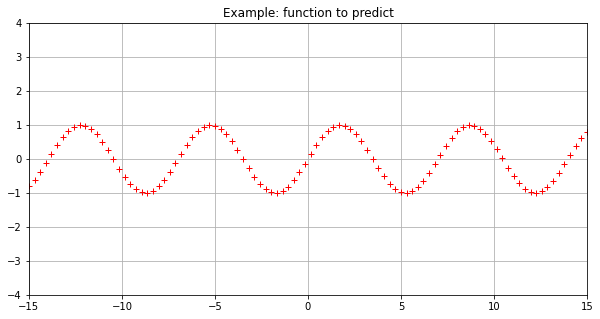

In [6]:
# Example 
Xe = np.linspace(x_min, x_max, n)
Ye = f(Xe)

plot_f(Xe, Ye, 'Example: function to predict', symbol='+', color='r', size=(10, 5))

#### Test points

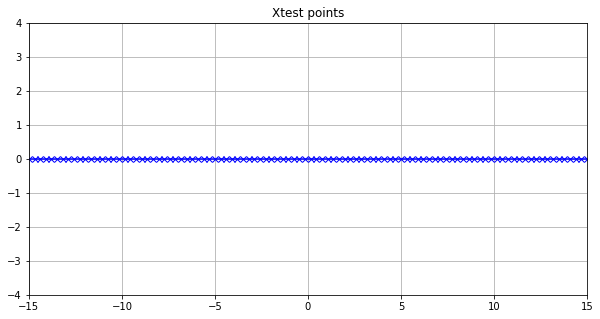

In [7]:
# We pick up n points equally spaced on x-axis in the range (-5, 5)
Xtest = np.linspace(x_min, x_max, n).reshape(-1,1)

y = np.zeros(n)

plt.figure(1, figsize=(10, 5))
plt.clf()
plt.plot(Xtest, y, marker='x', color = 'b')
plt.title('Xtest points')
plt.axis([x_min, x_max, y_min, y_max])
plt.grid()

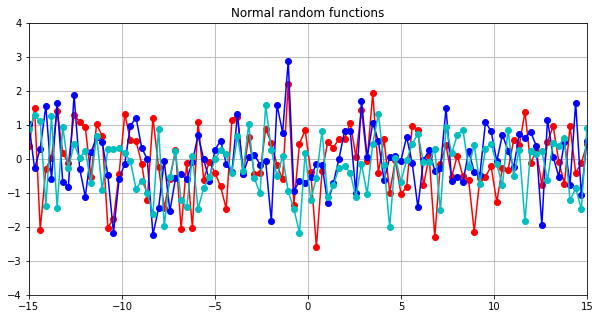

In [8]:
# We sample 3 times n random points from a standard normal 
sample_f = np.random.normal(size=(n,3))

plt.figure(1, figsize=(10, 5))

plt.clf()
plt.plot(Xtest, sample_f[:,0], marker='o', color = 'r')
plt.plot(Xtest, sample_f[:,1], marker='o', color = 'b')
plt.plot(Xtest, sample_f[:,2], marker='o', color = 'c')
plt.title('Normal random functions')

plt.axis([x_min, x_max, y_min, y_max])
plt.grid()

In [9]:
# We calculate the covariance matrix (kernel) on the 50 equally spaced Xtest points 
Kss = rbf_kernel(Xtest, Xtest, gamma)

# Cholesky matrix calculation
Lss = np.linalg.cholesky(Kss + sn*np.eye(n))

# Note that Cholesky matrix is used to create correlations among random variables. 
# Suppose that x1 and x2 are independent standard normal variables. 
# The matrix Ls can be used to create new variables z1 and z2 such that the covariance of z1 and z2 equals Σ
# In particular, if you generate p standard normal variates, the Cholesky transformation maps the variables into variables
# for the multivariate normal distribution with covariance matrix Σ and centered at the origin (denoted MVN(0, Σ)).

# See proof below

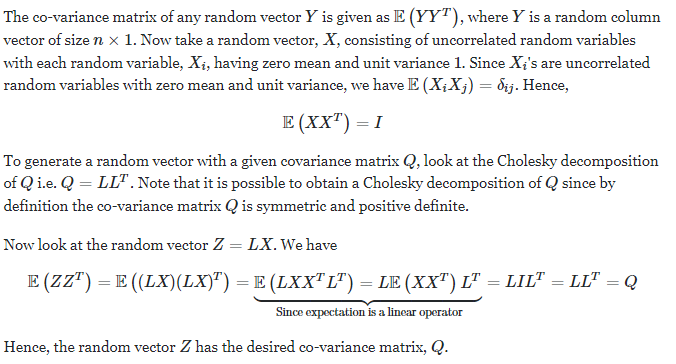

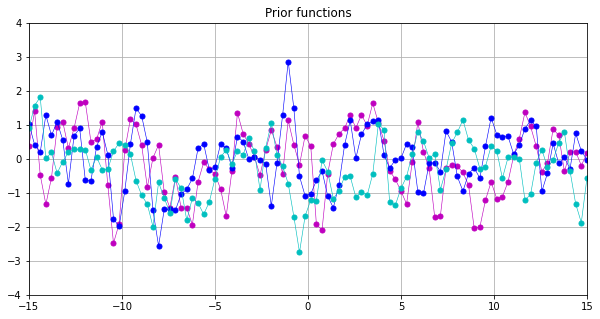

In [10]:
# By Cholesky trasformation we force the priors to have the same covariance matrix of the equally spaced Xtest points 

f_prior = np.dot(Lss, sample_f)

plt.figure(1, figsize=(10, 5))
plt.clf()
plt.plot(Xtest, f_prior[:,0], marker='o', color = 'm', linewidth=0.6, markersize=5)
plt.plot(Xtest, f_prior[:,1], marker='o', color = 'b', linewidth=0.6, markersize=5)
plt.plot(Xtest, f_prior[:,2], marker='o', color = 'c', linewidth=0.6, markersize=5)
plt.title('Prior functions')
plt.axis([x_min, x_max, y_min, y_max])
plt.grid()

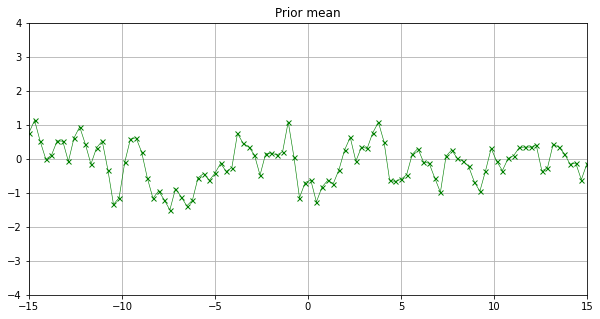

In [11]:
# The resulting priors have mean at each x that tends to zero wwith increasing n

prior_mean = f_prior.mean(axis=1)

plt.figure(1, figsize=(10, 5))
plt.clf()
plt.plot(Xtest, prior_mean, marker='x', color = 'g', linewidth=0.6, markersize=5)
plt.title('Prior mean')
plt.axis([x_min, x_max, y_min, y_max])
plt.grid()

#### Train points

Xtrain:
[[-10.75757576]
 [ -1.96969697]
 [ 12.87878788]
 [  2.27272727]
 [ -7.72727273]
 [ -9.54545455]
 [ -0.75757576]
 [  7.12121212]
 [ -2.27272727]
 [ 14.6969697 ]
 [ -8.33333333]
 [ -0.15151515]
 [ 10.15151515]
 [  4.6969697 ]
 [  6.51515152]]
f(Xtrain):
[ 0.25421913 -0.97968113 -0.82796079  0.88944898 -0.62205153 -0.74053685
 -0.63020575  0.12557322 -0.88944898  0.61382926 -0.93799998 -0.13594141
  0.2844324  -0.88462074 -0.40734856]
y = f(X) + noise: 
[ 0.25599952 -0.94818243 -0.85174862  0.89980094 -0.62573821 -0.71043376
 -0.59322913  0.14498766 -0.89196106  0.60697489 -0.93275601 -0.14053345
  0.29136382 -0.8728562  -0.43387805]


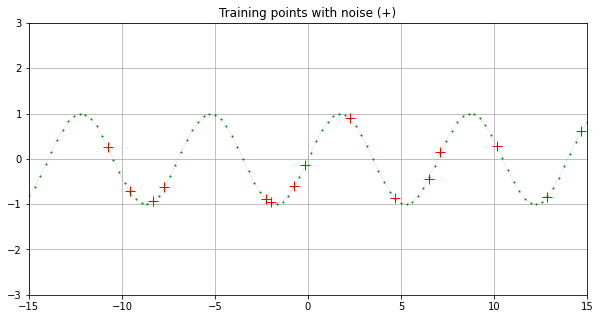

In [12]:
# The unknown underling function over the test points is
Yunknown = f(Xtest)

# We sample now some input points without noise from the initial unknown sine function and we use them as training points 
# to adjust our prior functions

Xtrain = np.random.choice(Xtest.ravel(), size=(N, 1), replace=False)
print('Xtrain:')
print(Xtrain)

fx = f(Xtrain)
print('f(Xtrain):')
print(fx)

# By adding the noise component the corresponding y=f(x) for the train points is

rnd_noise = sn*np.random.randn(N)

Ytrain = fx + rnd_noise

print('y = f(X) + noise: ')
print(Ytrain)

plt.figure(1, figsize=(10, 5))
plt.clf()
plt.plot(Xtrain, Ytrain, '+', color = 'r', ms=10)
plt.plot(Xtest, Yunknown, marker='o', color = 'g', linewidth=0.1, markersize=1)
plt.title('Training points with noise (+)')
plt.axis([x_min, x_max, -3, 3])
plt.grid()


### Theory overview

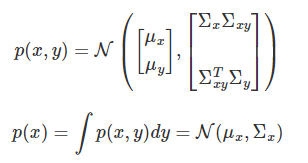

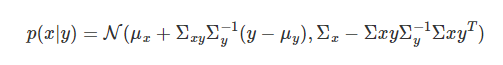

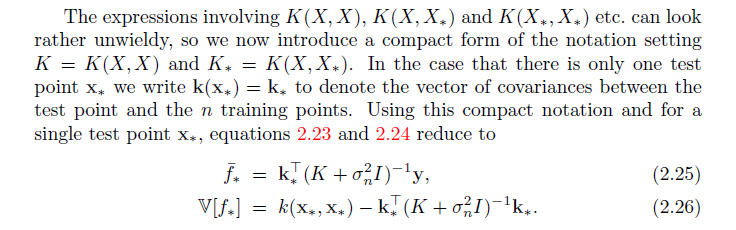

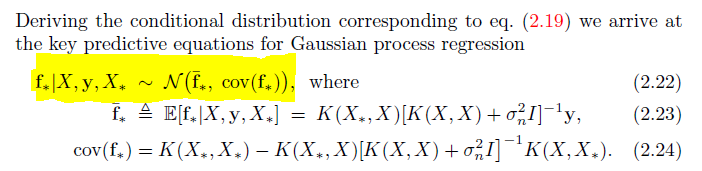

In [13]:
# By using the Cholesky decomposition we have:

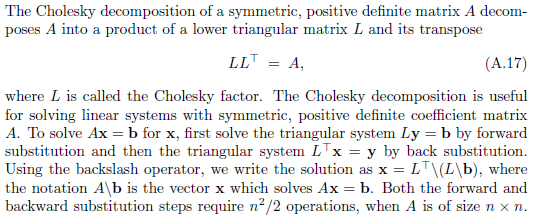

In [14]:
# The algorithm is:

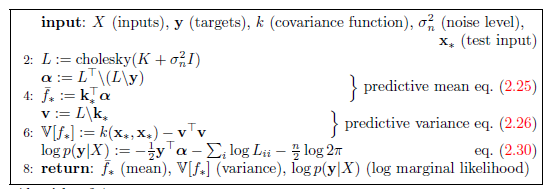

In [15]:
# Compute mean at our train points
K = rbf_kernel(Xtrain, Xtrain, gamma)
L = np.linalg.cholesky(K + sn*np.eye(len(Xtrain)))

Ly = np.linalg.solve(L, Ytrain)
alpha = np.linalg.solve(L.T, Ly)

Ks = rbf_kernel(Xtrain, Xtest, gamma)

meanFs = np.dot(Ks.T, alpha)

print('Predictive mean eq.2.25')
print(meanFs.shape)
print(meanFs)



# Compute the variance and standard deviation at our train points
v = np.linalg.solve(L, Ks)
covFs = Kss - np.dot(v.T, v)   # Covariance matrix
varFs = np.diag(covFs)         # np.diag gets the diagonal elements (variance) from argument matrix
stdFs = np.sqrt(varFs)
print('\nPredictive variance, diagonal of eq.2.26')
print(meanFs.shape)
print(varFs)

Predictive mean eq.2.25
(100,)
[ 2.07914480e-40  5.03153649e-35  4.86088494e-30  1.87468748e-25
  2.88629846e-21  1.77399512e-17  4.35273699e-14  4.26354897e-11
  1.66716624e-08  2.60246790e-06  1.62177528e-04  4.03454706e-03
  4.00679608e-02  1.58847289e-01  2.50971121e-01  1.47683637e-01
 -7.08723717e-02 -4.35810558e-01 -6.96511114e-01 -4.53296653e-01
 -2.44904346e-01 -5.48795520e-01 -9.15983016e-01 -8.34707519e-01
 -6.16089479e-01 -3.18275163e-01 -7.74253060e-02 -7.75035600e-03
 -3.11249328e-04 -4.99387757e-06 -3.19904994e-08 -8.18110018e-11
 -8.35223389e-14 -6.82642471e-17 -8.39999019e-14 -8.23441370e-11
 -3.22629149e-08 -5.06133438e-06 -3.19316915e-04 -8.18745748e-03
 -8.73740844e-02 -4.06614094e-01 -8.82262288e-01 -9.35605680e-01
 -4.83806869e-01 -1.99452878e-01 -3.73638955e-01 -5.81755689e-01
 -3.92889286e-01 -1.39570521e-01 -3.96259090e-02 -8.04289330e-03
 -7.69410910e-04  5.37937650e-04  1.41555153e-02  1.40586594e-01
  5.57372688e-01  8.82157787e-01  5.57372687e-01  1.4058654

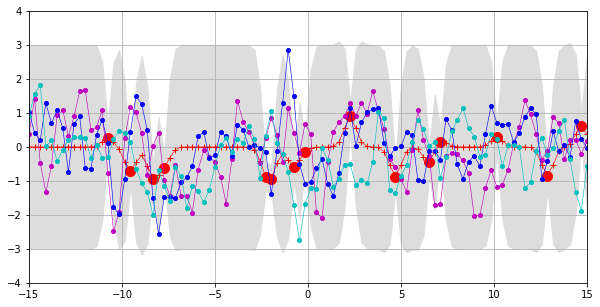

In [16]:
# Let's plot the mean and the standard deviation
plt.figure(1, figsize=(10, 5))
plt.clf()

# Plot train points
plt.plot(Xtrain, Ytrain, 'ro', ms=10)

# Plot posterior mean
plt.plot(Xtest, meanFs, 'r', marker='+', color = 'r', linewidth=0.6, markersize=6)

# Plot posterior confidence region
plt.gca().fill_between(Xtest.flat, meanFs-3*stdFs, meanFs+3*stdFs, color="#dddddd")

# Plot (unconstrained) priors
plt.plot(Xtest, f_prior[:,0], marker='o', color = 'm', linewidth=0.6, markersize=4)
plt.plot(Xtest, f_prior[:,1], marker='o', color = 'b', linewidth=0.6, markersize=4)
plt.plot(Xtest, f_prior[:,2], marker='o', color = 'c', linewidth=0.6, markersize=4)

plt.axis([x_min, x_max, y_min, y_max])
plt.grid()


# As we can see below the sampled priors are  not constrained to pass through the train points 

In [17]:
# We sample now 3 regression functions from the posterior distribution

f_post = np.random.multivariate_normal(meanFs, covFs, 3).T
#f_post

MAE = mean_absolute_error(Yunknown, meanFs)

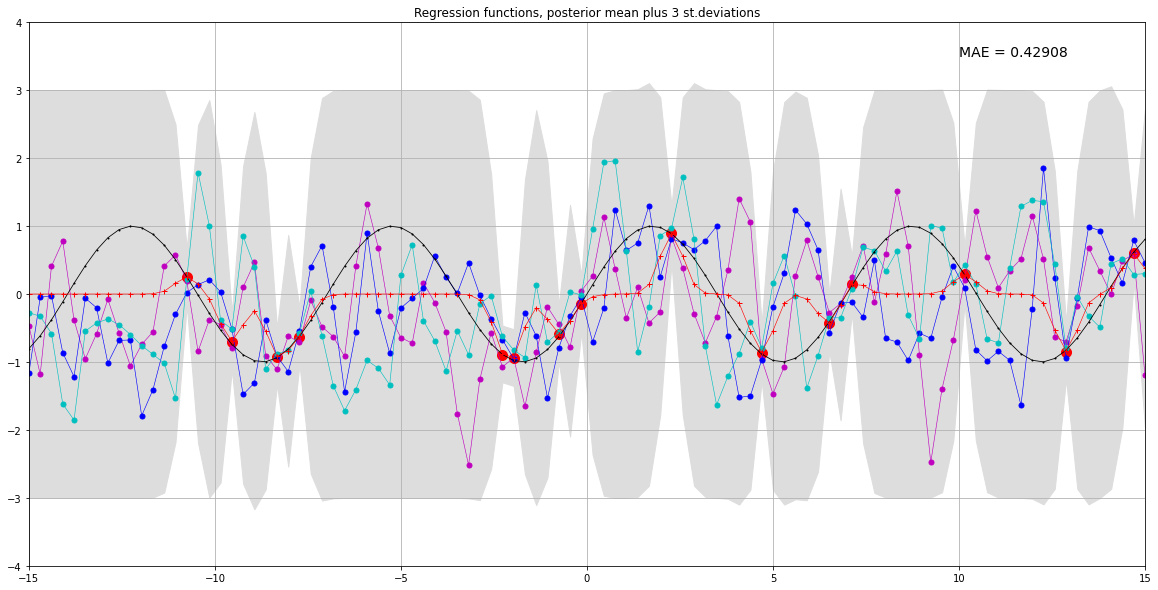

In [18]:
# Plot the functions sampled from the posterior distribution

plt.figure(1, figsize=(20, 10))
plt.clf()

plt.plot(Xtrain, Ytrain, 'ro', ms=10)

plt.plot(Xtest, f_post[:,0], marker='o', color = 'm', markersize=5, linewidth=0.6)
plt.plot(Xtest, f_post[:,1], marker='o', color = 'b', markersize=5, linewidth=0.6)
plt.plot(Xtest, f_post[:,2], marker='o', color = 'c', markersize=5, linewidth=0.6)
plt.plot(Xtest, Yunknown,    marker='o', color = 'k', markersize=1, linewidth=0.8)

plt.gca().fill_between(Xtest.flat, meanFs-3*stdFs, meanFs+3*stdFs, color="#dddddd")

plt.plot(Xtest, meanFs, marker='+', color='r', markersize=5, linewidth=0.6)

plt.title('Regression functions, posterior mean plus 3 st.deviations')
plt.annotate(f'MAE = {round(MAE,5)}',xy=(10,3.5), size=14)
plt.axis([x_min, x_max, y_min, y_max])
plt.grid()

##### MAE calculation

In [19]:
MAE = mean_absolute_error(Yunknown, meanFs)

print(f'MAE is: {MAE}')

MAE is: 0.42907680330000164


# Use scikit-learn lib

##### In this part we will repeat the same steps as above by using the scikit-learn library

In [20]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

In [21]:
# Let's first use the same kernel as before to check the library baseline

l = kernel_param**0.5

kernel_1 = RBF(length_scale=l, length_scale_bounds='fixed') # length_scale_bounds="fixed" -> the kernel hyperparameters are not optimized, we use the same set as above to check we get the same results

##### Where RBF is:
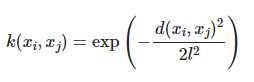

In [22]:
gaussian_process = GaussianProcessRegressor(kernel=kernel_1, alpha=sn, n_restarts_optimizer=0)

gaussian_process.fit(Xtrain, Ytrain)

mean_prediction, std_prediction = gaussian_process.predict(Xtest, return_std=True)

#print(mean_prediction)
#print(std_prediction)

In [23]:
# We compare with the previous obtained results

diff_mean = meanFs - mean_prediction
diff_var = varFs - (std_prediction**2)

print('Predictive mean vectors sum of diff: ' + str(diff_mean.sum()) )
print('Predictive variance vectors sum of diff: ' + str(diff_var.sum()) )

# The difference in meand and variance is negligible

MAE = mean_absolute_error(Yunknown, mean_prediction)

print(f'MAE is: {MAE}')

Predictive mean vectors sum of diff: 3.31274410679717e-13
Predictive variance vectors sum of diff: 3.3211627892271167e-13
MAE is: 0.4290768032999999


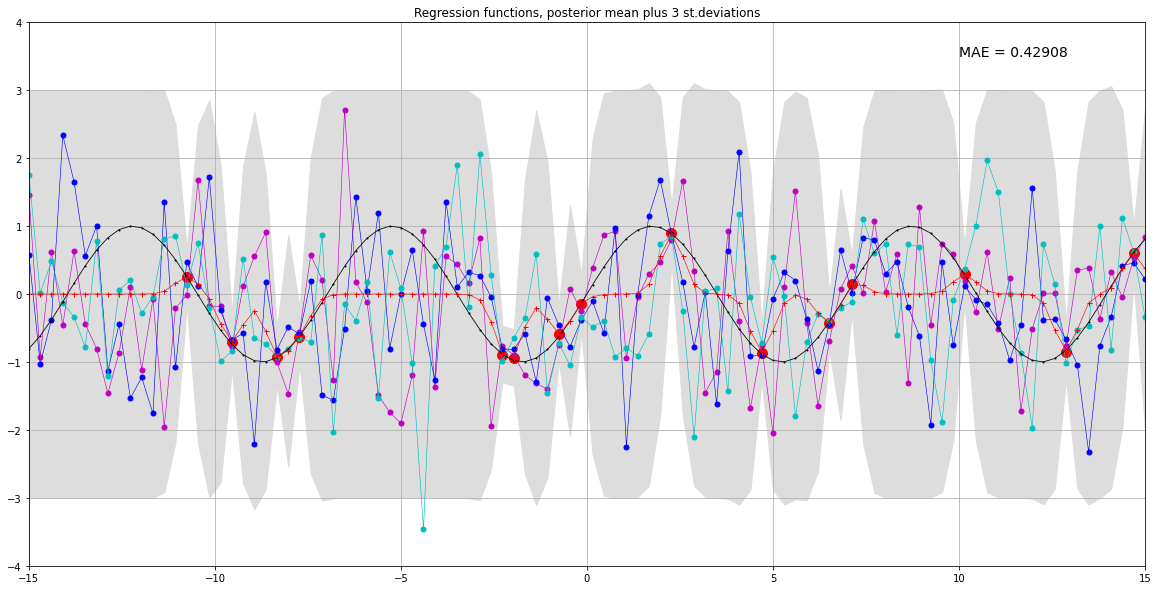

In [24]:
f_post = np.random.multivariate_normal(mean_prediction, (std_prediction**2)*np.eye(len(std_prediction)), 3).T

plt.figure(1, figsize=(20, 10))
plt.clf()

plt.plot(Xtrain, Ytrain, 'ro', ms=10)

plt.plot(Xtest, f_post[:,0], marker='o', color = 'm', markersize=5, linewidth=0.6)
plt.plot(Xtest, f_post[:,1], marker='o', color = 'b', markersize=5, linewidth=0.6)
plt.plot(Xtest, f_post[:,2], marker='o', color = 'c', markersize=5, linewidth=0.6)
plt.plot(Xtest, Yunknown,    marker='o', color = 'k', markersize=1, linewidth=0.8)

plt.gca().fill_between(Xtest.flat, mean_prediction-3*std_prediction, mean_prediction+3*std_prediction, color="#dddddd")

plt.plot(Xtest, mean_prediction, marker='+', color='r', markersize=5, linewidth=0.6)

plt.title('Regression functions, posterior mean plus 3 st.deviations')
plt.annotate(f'MAE = {round(MAE,5)}', xy=(10,3.5), size=14)
plt.axis([x_min, x_max, y_min, y_max])
plt.grid()

#### Kernel  optimization

In [25]:
kernel_2 = ConstantKernel(constant_value=1.0, constant_value_bounds=(0.0001, 10000)) * RBF(length_scale=1.0, length_scale_bounds=(0.0001, 10000))

In [26]:
gaussian_process = GaussianProcessRegressor(kernel=kernel_2, alpha=sn, n_restarts_optimizer=100)

gaussian_process.fit(Xtrain, Ytrain)

mean_prediction, std_prediction = gaussian_process.predict(Xtest, return_std=True)

MAE = mean_absolute_error(Yunknown, mean_prediction)
print(f'MAE is: {MAE}')

# There is no improvement

MAE is: 0.23529684920913188


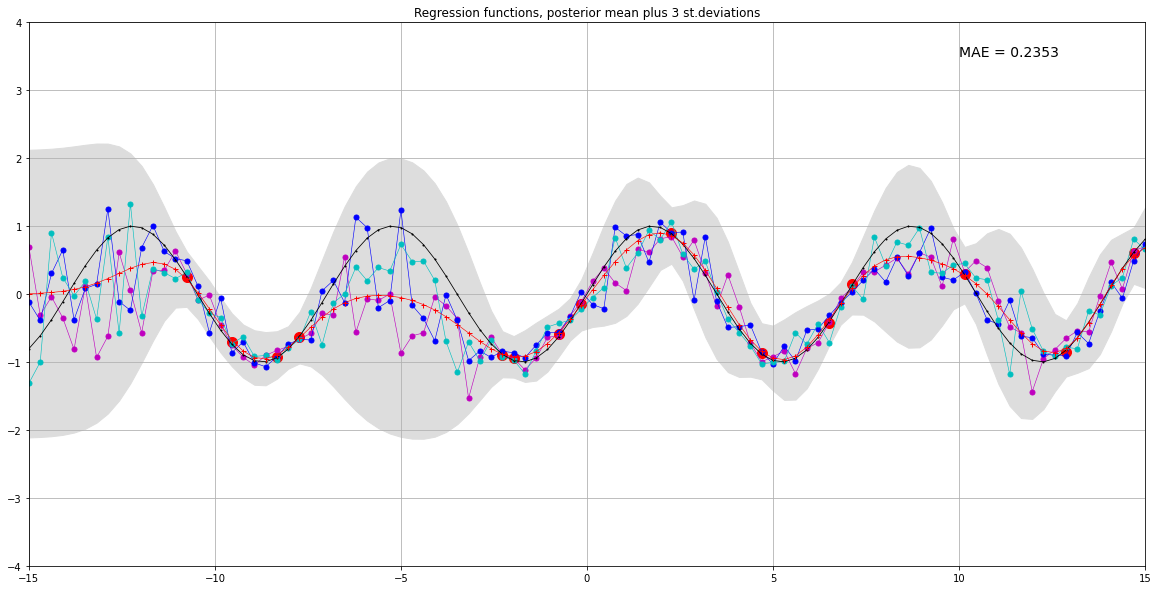

In [27]:
f_post = np.random.multivariate_normal(mean_prediction, (std_prediction**2)*np.eye(len(std_prediction)), 3).T

plt.figure(1, figsize=(20, 10))
plt.clf()

plt.plot(Xtrain, Ytrain, 'ro', ms=10)

plt.plot(Xtest, f_post[:,0], marker='o', color = 'm', markersize=5, linewidth=0.6)
plt.plot(Xtest, f_post[:,1], marker='o', color = 'b', markersize=5, linewidth=0.6)
plt.plot(Xtest, f_post[:,2], marker='o', color = 'c', markersize=5, linewidth=0.6)
plt.plot(Xtest, Yunknown,    marker='o', color = 'k', markersize=1, linewidth=0.8)

plt.gca().fill_between(Xtest.flat, mean_prediction-3*std_prediction, mean_prediction+3*std_prediction, color="#dddddd")

plt.plot(Xtest, mean_prediction, marker='+', color='r', markersize=5, linewidth=0.6)

plt.title('Regression functions, posterior mean plus 3 st.deviations')
plt.annotate(f'MAE = {round(MAE,5)}', xy=(10,3.5), size=14)
plt.axis([x_min, x_max, y_min, y_max])
plt.grid()

#### Periodic kernel

In [28]:
# Let's try to improve the MAE by introducing a periodic kernel component

In [29]:
kernel_3 = kernel_2 * ExpSineSquared(length_scale=1.0, periodicity=1.0, length_scale_bounds=(0.0001, 10000), periodicity_bounds=(0.1, 100))

In [30]:
gaussian_process = GaussianProcessRegressor(kernel=kernel_3, alpha=sn, n_restarts_optimizer=100)

gaussian_process.fit(Xtrain, Ytrain)

mean_prediction, std_prediction = gaussian_process.predict(Xtest, return_std=True)

f_post = np.random.multivariate_normal(mean_prediction, (std_prediction**2)*np.eye(len(std_prediction)), 3).T

MAE = mean_absolute_error(Yunknown, mean_prediction)
print(f'MAE is: {MAE}')

MAE is: 0.01359316151355678


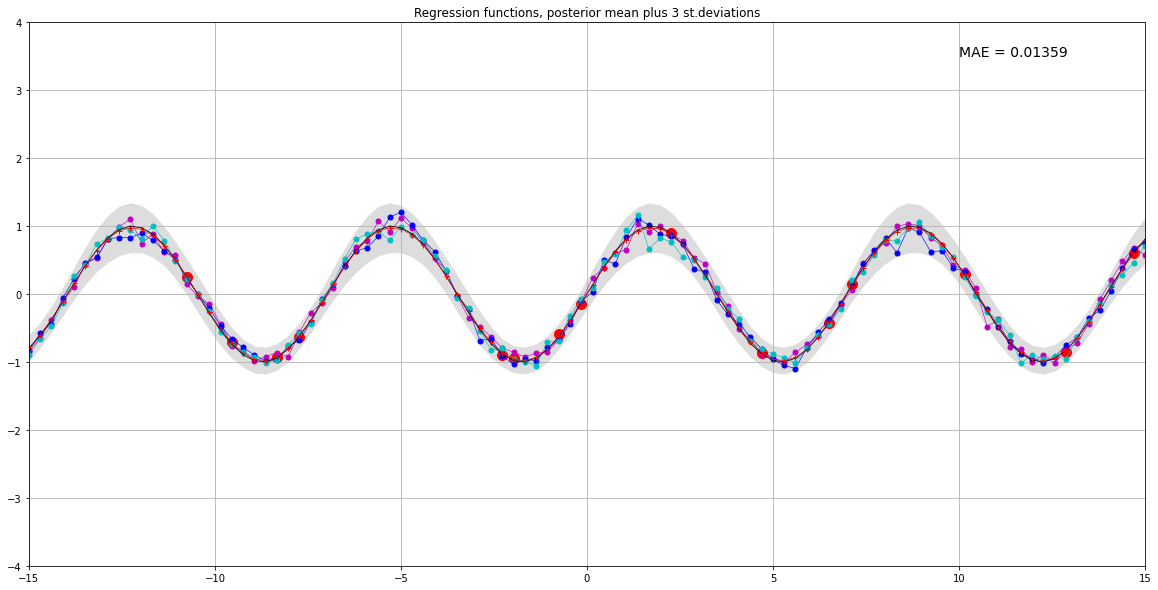

In [31]:
ENABLE_POST_FUNCTIONS_PLOT = True

plt.figure(1, figsize=(20, 10))
plt.clf()

plt.plot(Xtrain, Ytrain, 'ro', ms=10)

if ENABLE_POST_FUNCTIONS_PLOT == True:
    plt.plot(Xtest, f_post[:,0], marker='o', color = 'm', markersize=5, linewidth=0.6)
    plt.plot(Xtest, f_post[:,1], marker='o', color = 'b', markersize=5, linewidth=0.6)
    plt.plot(Xtest, f_post[:,2], marker='o', color = 'c', markersize=5, linewidth=0.6)
    
plt.plot(Xtest, Yunknown,    marker='o', color = 'k', markersize=1, linewidth=0.8)

plt.gca().fill_between(Xtest.flat, mean_prediction-3*std_prediction, mean_prediction+3*std_prediction, color="#dddddd")

plt.plot(Xtest, mean_prediction, marker='+', color='r', markersize=5, linewidth=0.6)

plt.title('Regression functions, posterior mean plus 3 st.deviations')
plt.annotate(f'MAE = {round(MAE,5)}', xy=(10,3.5), size=14)
plt.axis([x_min, x_max, y_min, y_max])
plt.grid()

#### Out of sample prediction

In [32]:
# We split our data (part '_1' and part '_2')to perform out of the sample predictions (30% of data is for prediction)

pred_perc = 0.7

x_split = x_min + int(pred_perc*(x_max-x_min))

Xtest_1     = Xtest[Xtest < x_split]
Yunknown_1 = f(Xtest_1)

Xtest_2  = Xtest[Xtest >= x_split]
Yunknown_2 = f(Xtest_2)

# We keep only train data that belong to the first interval

train_1_idx = np.where(Xtrain < x_split)[0] # Mask

Xtrain_1 = np.array(Xtrain[train_1_idx])

rnd_noise_1 = rnd_noise[train_1_idx] 

Ytrain_1 = f(Xtrain_1) + rnd_noise_1

In [33]:
# We refit the same model (kernel_3)

gaussian_process = GaussianProcessRegressor(kernel=kernel_3, alpha=sn, n_restarts_optimizer=100)

gaussian_process.fit(Xtrain_1, Ytrain_1)

mean_prediction_1, std_prediction_1 = gaussian_process.predict(Xtest_1.reshape(-1, 1), return_std=True)
mean_prediction_2, std_prediction_2 = gaussian_process.predict(Xtest_2.reshape(-1, 1), return_std=True)

f_post_1 = np.random.multivariate_normal(mean_prediction_1, (std_prediction_1**2)*np.eye(len(std_prediction_1)), 3).T
f_post_2 = np.random.multivariate_normal(mean_prediction_2, (std_prediction_2**2)*np.eye(len(std_prediction_2)), 3).T

In [34]:
# Composed MAE

mean_prediction = np.concatenate((mean_prediction_1,mean_prediction_2))

MAE = mean_absolute_error(Yunknown, mean_prediction)
print(f'MAE is: {MAE}')

MAE is: 0.03275120209644253


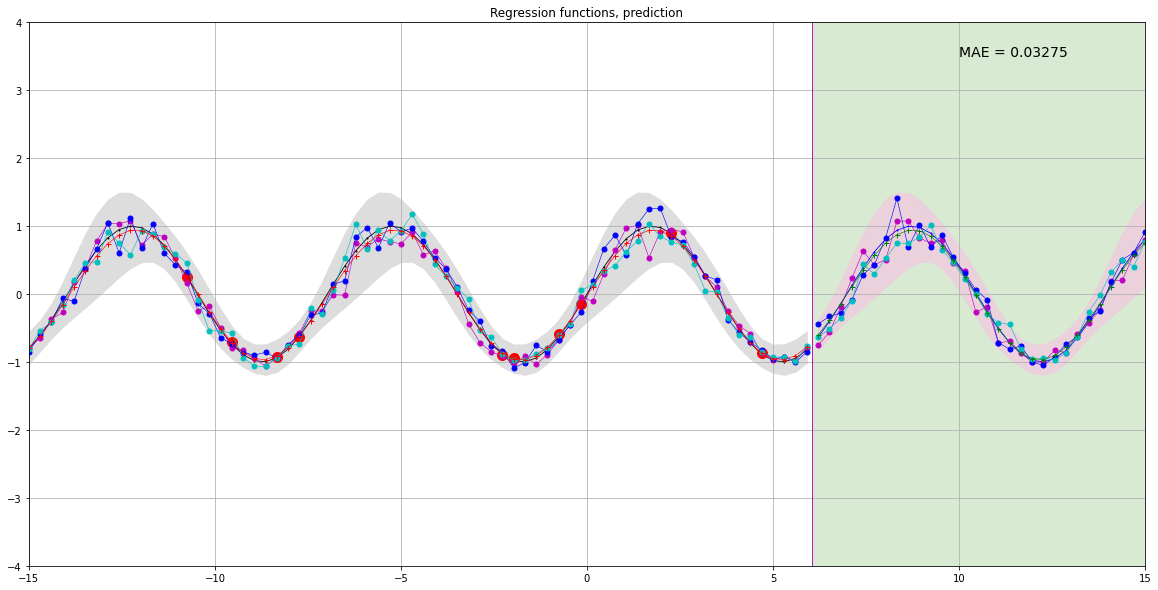

In [35]:
ENABLE_POST_FUNCTIONS_PLOT = True

plt.figure(1, figsize=(20, 10))
plt.clf()

plt.plot(Xtest_1, Yunknown_1,    marker='o', color = 'k', markersize=1, linewidth=0.8)
plt.plot(Xtest_2, Yunknown_2,    marker='o', color = 'b', markersize=1, linewidth=0.8)

x_split = (Xtest_1[-1] + Xtest_2[0])/2

plt.vlines(x=x_split, ymin=-4, ymax=4, colors='m', linestyles='solid', linewidth=0.9)
plt.axvspan(x_split, x_max, facecolor='#d9ead3', zorder = -10)

plt.plot(Xtrain_1, Ytrain_1, 'ro', ms=10)


if ENABLE_POST_FUNCTIONS_PLOT == True:
    plt.plot(Xtest_1, f_post_1[:,0], marker='o', color = 'm', markersize=5, linewidth=0.6)
    plt.plot(Xtest_1, f_post_1[:,1], marker='o', color = 'b', markersize=5, linewidth=0.6)
    plt.plot(Xtest_1, f_post_1[:,2], marker='o', color = 'c', markersize=5, linewidth=0.6)
    
    plt.plot(Xtest_2, f_post_2[:,0], marker='o', color = 'm', markersize=5, linewidth=0.6)
    plt.plot(Xtest_2, f_post_2[:,1], marker='o', color = 'b', markersize=5, linewidth=0.6)
    plt.plot(Xtest_2, f_post_2[:,2], marker='o', color = 'c', markersize=5, linewidth=0.6)

plt.plot(Xtest_1, mean_prediction_1, marker='+', color='r', markersize=5, linewidth=0.6)
plt.plot(Xtest_2, mean_prediction_2, marker='+', color='g', markersize=5, linewidth=0.6)

plt.gca().fill_between(Xtest_1.flat, mean_prediction_1-3*std_prediction_1, mean_prediction_1+3*std_prediction_1, color="#dddddd")
plt.gca().fill_between(Xtest_2.flat, mean_prediction_2-3*std_prediction_2, mean_prediction_2+3*std_prediction_2, color="#ead1dc")

plt.title('Regression functions, prediction')
plt.annotate(f'MAE = {round(MAE,5)}', xy=(10,3.5), size=14)
plt.axis([x_min, x_max, y_min, y_max])
plt.grid()
plt.savefig('predictive.png', bbox_inches='tight')

In [36]:
# There's a MAE increase due to the missing training points

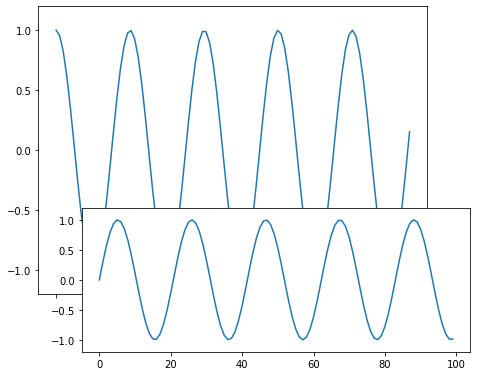

In [37]:
# Trials

fig = plt.figure()
ax1 = fig.add_axes([0, 0.2, 0.9, 1], xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0, 0.9, 0.5], ylim=(-1.2, 1.2))
x = np.linspace(0, 30, 100)
ax1.plot(np.cos(x))
ax2.plot(np.sin(x))